# Project 3: Predicting Winners in Soccer Matches

Predicting the outcome of a sporting event is a challenging task, so much so that an entire industry exists to relieve  those who believe they can do so of their money. Despite the challenging nature of the task, there are a few people who manage to make their living (and a very good living at that!) making predictions and betting on the outcomes. Your job is to try your hand at this with a basic model.

## The Data

For this project, you are going to use a large *relational database* of publicly available information on European soccer matches that is available [here](https://www.kaggle.com/hugomathien/soccer/kernels). This database is a SQLite database. A relational database is a data structure which contains several related tables, where each table is similar to a dataframe. There are a couple of advantages to having the data in a database: for one thing, you can 'peek' at the data without loading it all into memory. Also, databases tend to be strongly typed, so that you always know the type of data that is loaded in each column (though actually SQLite is much looser in this regard than other database software). 

## The Objective(s)

Below, you will tag every match with a 1 for home team win or draw and a 0 for away team win. Your goal is to build a model to predict whether the game is a home team win or draw or an away team win. You must:

1. Explore the dataset. What appears to correlate with home team wins/losses? What is missing?
2. Separate the data into a set for training (building the model) and testing. The test set size should not be more than 20% of the full dataset.
3. Build a model to predict who wins. To determine the quality of the model, assess the model by calculating the accuracy. You can write a function to do this or use scikit-learn's `accuracy_score`, which is in the `metrics` submodule.
4. Build a couple of different models (creating a different model means using a different set of predictor variables). Which performs the best on the held-out testing dataset? Bonus points for creativity and thoroughness! You must create and test a minimum of three different models for full credit.

## Teams

1. Evan Royer, Briana Garcia (Durham)
2. Evan O'Reilly, Jacob Mechaber (Durham)
3. Patrick Donovan, Kelvin Nguyen, Robert Patenaude
4. Aaron Broady, Andrew Meyer, Wesley Couturier, Ryan Kiessling
5. Angus Jameson, Danielle LeBoeuf, Craig Vignault 
6. Brent Groden, Stephen McCarter, Aurora VanDeWater

Consider using Git/Github to share and manage your work!

## Due Date

Due by Tuesday, May 2, 3:39 PM. Submit as an HTML file on myCourses.

## Final Thoughts

This is an extremely challenging prediction task. To get a sense of how hard it is, start by making a couple absolutely dumb baseline models: predicting always home team wins, for instance, or predicting wins entirely at random. Measure the accuracy of these models. As you develop more sophisticated models, refer back to these dumb ones. Did your model do better?

This database has been explored quite a bit on [kaggle.com](https://www.kaggle.com). Feel free to use what you see there.

In [1]:
'''
DO NOT CHANGE ANYTHING IN THIS CELL
YOU MUST RUN THIS CELL TO CONTINUE
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline
plt.style.use('bmh')

## Getting the data out of the database

To get data from a database, you must first connect to it from Python. Once you've connected, you then need to create a cursor. A cursor is a temporary memory space where operations can be performed.

In [9]:
'''
CHANGE YOUR PATH IN THE LINE BELOW
'''

path_to_my_database = 'database/database.sqlite'
conn = sqlite3.connect(path_to_my_database)  # connect to database
cur = conn.cursor()  # create cursor

## Getting A View of the Database

One way to get an overview of the entire database is to look at the code that created it. This is SQL (Structured Query Language), which you do not know yet, but which is fairly intuitive. We'll execute a command to view the contents of the sqlite_master table, which contains the code that created the underlying tables. Syntax is as follows: first execute, then fetch the results (if you don't fetch them, they exist, but they remain in the cursor's temporary workspace).

In [10]:
'''
DO NOT CHANGE ANYTHING IN THIS CELL
'''

cur.execute("select * from sqlite_master where type == 'table';").fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  4,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'Player_Attributes',
  'Player_Attributes',
  11,
  'CREATE TABLE "Player_Attributes" (\n\t`id`\tINTEGER PRIMARY KEY AUTOINCREMENT,\n\t`player_fifa_api_id`\tINTEGER,\n\t`player_api_id`\tINTEGER,\n\t`date`\tTEXT,\n\t`overall_rating`\tINTEGER,\n\t`potential`\tINTEGER,\n\t`preferred_foot`\tTEXT,\n\t`attacking_work_rate`\tTEXT,\n\t`defensive_work_rate`\tTEXT,\n\t`crossing`\tINTEGER,\n\t`finishing`\tINTEGER,\n\t`heading_accuracy`\tINTEGER,\n\t`short_passing`\tINTEGER,\n\t`volleys`\tINTEGER,\n\t`dribbling`\tINTEGER,\n\t`curve`\tINTEGER,\n\t`free_kick_accuracy`\tINTEGER,\n\t`long_passing`\tINTEGER,\n\t`ball_control`\tINTEGER,\n\t`acceleration`\tINTEGER,\n\t`sprint_speed`\tINTEGER,\n\t`agility`\tINTEGER,\n\t`reactions`\tINTEGER,\n\t`balance`\tINTEGER,\n\t`shot_power`\tINTEGER,\n\t`jumping`\tINTEGER,\n\t`stamina`\tINTEGER,\n\t`strength`\tINTEGER,\n\t`long_shots`\tINTEGER,\n\t`aggr

## Getting Data From SQLite into Python

As you can see, there are tables like Player_Attributes, Player, Matches, Team_Attributes, and so on. It's easy to bring one of these tables into Pandas with a simple SQL query. In SQL, * is a stand-in for 'everything'. To read a SQL query, keep in mind that you need a connection open, and you need to specify the connection when you write the query.

In [11]:
player_attributes = pd.read_sql_query('select * from Player_Attributes', conn)  # don't forget to specify the connection
print(player_attributes.shape)
player_attributes.head()

(183978, 42)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [12]:
'''
DO NOT CHANGE ANYTHING IN THIS CELL
'''

players = pd.read_sql_query('select * from Player', conn)  # don't forget to specify the connection
print(players.shape)
players.head()

(11060, 7)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [13]:
matches = pd.read_sql_query('select * from Match', conn)  # specify the connection
print(matches.shape)
matches.head()

(25979, 115)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [14]:
league = pd.read_sql_query('select * from League', conn)  # don't forget to specify the connection
print(league.shape)
league.head()

(11, 3)


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [15]:
country = pd.read_sql_query('select * from Country', conn)  # don't forget to specify the connection
print(country.shape)
country.head()

(11, 2)


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [16]:
teams = pd.read_sql_query('select * from Team', conn)  # don't forget to specify the connection
print(teams.shape)
teams.head()

(299, 5)


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [17]:
team_attributes = pd.read_sql_query('select * from Team_Attributes', conn)  # don't forget to specify the connection
print(team_attributes.shape)
team_attributes.head()

(1458, 25)


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


## Complex Queries

You can bring in selected subsets of the database using more complex SQL queries. If you know SQL already, this may be useful. We won't have time to go into complex SQL queries, but it's worth your while to read a little bit about the language; after all, SQL is one of the top languages for data science in its own right. See [this non-python specific SQLite tutorial](https://www.tutorialspoint.com/sqlite/) for an introduction. Fortunately, this dataset is small enough that you should be able to bring most/all of it into memory and thereby work almost entirely in Python.

## Labeling The Matches

The dataset currently doesn't contain a column stating who won and who lost. You'll need to add that. To do so, you can do something like below. You may group draws with home team wins. 

In [18]:
'''
DO NOT CHANGE ANYTHING IN THIS CELL
'''

matches['home_team_win_or_draw'] = 0
matches.loc[matches['home_team_goal'] >= matches['away_team_goal'], 'home_team_win_or_draw'] = 1

# Good Luck!

# Part 1
Explore the dataset. What appears to correlate with home team wins/losses? What is missing?

In [19]:
matches._get_numeric_data().columns.tolist()

['id',
 'country_id',
 'league_id',
 'stage',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 'home_player

In [20]:
team_attributes._get_numeric_data().columns.tolist()

['id',
 'team_fifa_api_id',
 'team_api_id',
 'buildUpPlaySpeed',
 'buildUpPlayDribbling',
 'buildUpPlayPassing',
 'chanceCreationPassing',
 'chanceCreationCrossing',
 'chanceCreationShooting',
 'defencePressure',
 'defenceAggression',
 'defenceTeamWidth']

In [21]:
win_draw_team = matches['home_team_win_or_draw'].groupby(matches['home_team_api_id'])
ratio_win_home_team = win_draw_team.apply(lambda x: x.sum() / len(x))
ratio_win_home_team.head()
print(ratio_win_home_team.shape)

(299,)


In [22]:
print(team_attributes['buildUpPlaySpeed'].isnull().sum())
print(team_attributes['buildUpPlayDribbling'].isnull().sum())
print(team_attributes['buildUpPlayPassing'].isnull().sum())
print(team_attributes['chanceCreationPassing'].isnull().sum())
print(team_attributes['chanceCreationCrossing'].isnull().sum())
print(team_attributes['chanceCreationShooting'].isnull().sum())
print(team_attributes['defencePressure'].isnull().sum())
print(team_attributes['defenceAggression'].isnull().sum())
print(team_attributes['defenceTeamWidth'].isnull().sum())

0
969
0
0
0
0
0
0
0


In [23]:
team_buildUpPlaySpeed = team_attributes['buildUpPlaySpeed'].groupby(team_attributes['team_api_id']).mean()
print(team_buildUpPlaySpeed.shape)
team_buildUpPlayDribbling = team_attributes['buildUpPlayDribbling'].groupby(team_attributes['team_api_id']).mean()
print(team_buildUpPlayDribbling.shape)
team_buildUpPlayPassing = team_attributes['buildUpPlayPassing'].groupby(team_attributes['team_api_id']).mean()
print(team_buildUpPlayPassing.shape)
team_chanceCreationPassing = team_attributes['chanceCreationPassing'].groupby(team_attributes['team_api_id']).mean()
print(team_chanceCreationPassing.shape)
team_chanceCreationCrossing = team_attributes['chanceCreationCrossing'].groupby(team_attributes['team_api_id']).mean()
print(team_chanceCreationCrossing.shape)
team_chanceCreationShooting = team_attributes['chanceCreationShooting'].groupby(team_attributes['team_api_id']).mean()
print(team_chanceCreationShooting.shape)
team_defencePressure = team_attributes['defencePressure'].groupby(team_attributes['team_api_id']).mean()
print(team_defencePressure.shape)
team_defenceAggression = team_attributes['defenceAggression'].groupby(team_attributes['team_api_id']).mean()
print(team_defenceAggression.shape)
team_defenceTeamWidth = team_attributes['defenceTeamWidth'].groupby(team_attributes['team_api_id']).mean()
print(team_defenceTeamWidth.shape)

(288,)
(288,)
(288,)
(288,)
(288,)
(288,)
(288,)
(288,)
(288,)


In [24]:
d = {'team_buildUpPlaySpeed' : pd.Series(team_buildUpPlaySpeed),
   ....:      'team_buildUpPlayDribbling' : pd.Series(team_buildUpPlayDribbling),
   ....:      'team_buildUpPlayPassing' : pd.Series(team_buildUpPlayPassing),
   ....:      'chanceCreationPassing' : pd.Series(team_chanceCreationPassing),
   ....:      'chanceCreationCrossing' : pd.Series(team_chanceCreationCrossing),
   ....:      'chanceCreationShooting' : pd.Series(team_chanceCreationShooting),
   ....:      'defencePressure' : pd.Series(team_defencePressure),
   ....:      'defenceAggression' : pd.Series(team_defenceAggression),
   ....:      'defenceTeamWidth' : pd.Series(team_defenceTeamWidth),
   ....:      'ratio_win_home_team' : pd.Series(ratio_win_home_team)}
   ....:

In [25]:
df = pd.DataFrame(d)
df.head()

,chanceCreationCrossing,chanceCreationPassing,chanceCreationShooting,defenceAggression,defencePressure,defenceTeamWidth,ratio_win_home_team,team_buildUpPlayDribbling,team_buildUpPlayPassing,team_buildUpPlaySpeed
1601,60.333333,55.500000,53.5,47.333333,47.166667,49.333333,0.683333,48.0,46.166667,47.333333
1773,53.000000,50.000000,54.0,44.000000,43.000000,50.000000,0.644444,51.0,50.000000,52.000000
1957,36.333333,50.833333,67.0,56.333333,49.333333,53.666667,0.750000,54.0,52.666667,47.166667
2033,44.200000,51.800000,48.2,33.800000,42.200000,45.400000,0.613333,62.0,48.400000,49.000000
2182,57.333333,56.666667,68.0,48.500000,51.666667,54.500000,0.841667,52.5,49.000000,60.333333


In [26]:
df.corr()

,chanceCreationCrossing,chanceCreationPassing,chanceCreationShooting,defenceAggression,defencePressure,defenceTeamWidth,ratio_win_home_team,team_buildUpPlayDribbling,team_buildUpPlayPassing,team_buildUpPlaySpeed
chanceCreationCrossing,1.000000,0.321127,-0.048644,0.018051,0.046529,0.123309,0.055389,-0.013324,0.254680,0.221423
chanceCreationPassing,0.321127,1.000000,0.098816,0.122559,0.172795,0.135042,0.126988,0.101533,0.202898,0.372923
chanceCreationShooting,-0.048644,0.098816,1.000000,0.133461,0.228046,0.178149,0.204038,0.116872,-0.163041,-0.008652
defenceAggression,0.018051,0.122559,0.133461,1.000000,0.436239,0.337498,0.120903,-0.066007,0.154895,0.155607
defencePressure,0.046529,0.172795,0.228046,0.436239,1.000000,0.564388,0.256836,-0.011199,-0.133007,-0.049331
defenceTeamWidth,0.123309,0.135042,0.178149,0.337498,0.564388,1.000000,0.089242,0.059487,0.030190,0.049785
ratio_win_home_team,0.055389,0.126988,0.204038,0.120903,0.256836,0.089242,1.000000,0.080593,-0.284132,0.030098
team_buildUpPlayDribbling,-0.013324,0.101533,0.116872,-0.066007,-0.011199,0.059487,0.080593,1.000000,-0.188931,0.055511
team_buildUpPlayPassing,0.254680,0.202898,-0.163041,0.154895,-0.133007,0.030190,-0.284132,-0.188931,1.000000,0.426408
team_buildUpPlaySpeed,0.221423,0.372923,-0.008652,0.155607,-0.049331,0.049785,0.030098,0.055511,0.426408,1.000000


In [31]:
df.corr()['ratio_win_home_team'].sort_values(ascending = False)

ratio_win_home_team          1.000000
defencePressure              0.256836
chanceCreationShooting       0.204038
chanceCreationPassing        0.126988
defenceAggression            0.120903
defenceTeamWidth             0.089242
team_buildUpPlayDribbling    0.080593
chanceCreationCrossing       0.055389
team_buildUpPlaySpeed        0.030098
team_buildUpPlayPassing     -0.284132
Name: ratio_win_home_team, dtype: float64

In [37]:
#team_attributes['buildUpPlayDribbling'].groupby(team_attributes['team_api_id']).fillna(team_attributes['buildUpPlayDribbling'].mean())
df['team_buildUpPlayDribbling'].fillna(df['team_buildUpPlayDribbling'].mean())

1601      48.000000
1773      51.000000
1957      54.000000
2033      62.000000
2182      52.500000
2183      48.562977
2186      50.000000
4049      48.562977
4064      48.562977
4087      43.000000
4170      48.562977
6269      57.000000
6351      48.562977
6367      48.562977
6391      53.000000
6403      40.000000
6413      38.000000
6421      48.562977
6433      42.500000
6493      48.562977
6547      54.000000
6601      48.562977
6631      33.000000
7730      55.000000
7788      37.500000
7794      61.000000
7819      50.000000
7841      47.000000
7842      56.000000
7844      52.000000
            ...    
10214     59.000000
10215     53.000000
10217     43.500000
10218     41.000000
10219     30.000000
10228     44.000000
10229     42.000000
10233     52.000000
10235     36.500000
10238     49.000000
10242     48.000000
10243     49.000000
10249     50.500000
10251     49.000000
10252     34.500000
10260     38.000000
10261     39.000000
10264     35.000000
10265     50.500000


# Part 2
Separate the data into a set for training (building the model) and testing. The test set size should not be more than 20% of the full dataset.

In [22]:
# your code here
import statsmodels.api as sm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score as acc
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from IPython.core.pylabtools import figsize

%matplotlib inline
plt.style.use('bmh')


import warnings

warnings.filterwarnings('ignore')

In [23]:
features = matches[['home_team_api_id', 'away_team_api_id']]
target = matches['home_team_win_or_draw']

Xtr, Xte, ytr, yte = train_test_split(features, target, test_size = 0.2, random_state = 0)

lm_1 = LogisticRegression().fit(Xtr, ytr)
preds_1 = lm_1.predict(Xte)
print(mse(yte, preds_1))
print(acc(yte, preds_1))

0.291377983064
0.708622016936


ValueError: x and y must be the same size

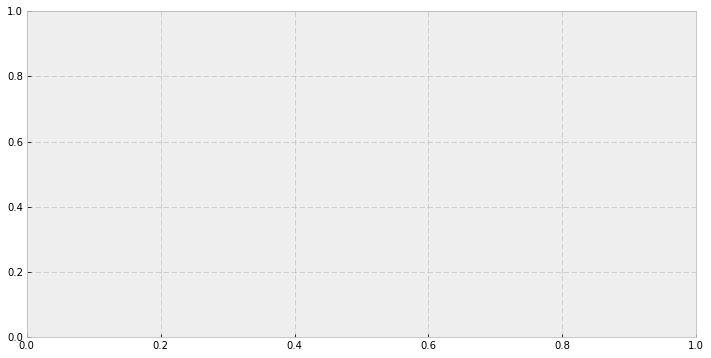

In [24]:
figsize(12,6)
plt.scatter(features, target)
plt.scatter(Xte, preds_1, color = 'red')

# Part 3
Build a model to predict who wins. To determine the quality of the model, assess the model by calculating the accuracy. You can write a function to do this or use scikit-learn's accuracy_score, which is in the metrics submodule.

In [ ]:
# your code here

# Part 4
Build a couple of different models (creating a different model means using a different set of predictor variables). Which performs the best on the held-out testing dataset? Bonus points for creativity and thoroughness! You must create and test a minimum of three different models for full credit.

In [ ]:
# your code here